## Загружаем необходимые библиотеки

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

## Загружаем данные

In [3]:
train = np.loadtxt('./data/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/test.csv', delimiter=',', skiprows=1)

In [4]:
train_label = train[:, 0].astype(int)

train_img = train[:, 1:].reshape(-1, 28, 28)
test_img = test.reshape(-1, 28, 28)

print(train_img.shape)
print(test_img.shape)


(42000, 28, 28)
(28000, 28, 28)


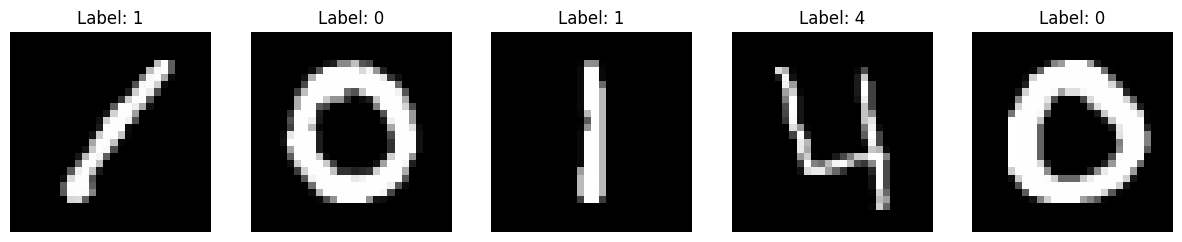

In [5]:
fig = plt.figure(figsize=(15, 5))

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(train_img[i], cmap='gray')
    ax.set_title(f'Label: {train_label[i]}')
    ax.axis('off')


In [6]:
winSize = (28, 28)
blockSize = (14, 14)
blockStride = (14, 14)
cellSize = (7, 7)
nbins = 9

hog = cv2.HOGDescriptor(
    winSize,
    blockSize,
    blockStride,
    cellSize,
    nbins
)


In [7]:
descriptor = hog.compute(np.uint8(train_img[0]))
print('Descriptor size:', len(descriptor))


Descriptor size: 144


In [8]:
def extract_hog_opencv(images, hog):
    features = np.zeros((len(images), hog.getDescriptorSize()), dtype=np.float32)
    for i in range(len(images)):
        features[i] = hog.compute(np.uint8(images[i])).flatten()
    return features


In [9]:
train_hog = extract_hog_opencv(train_img, hog)
test_hog = extract_hog_opencv(test_img, hog)

train_hog.shape


(42000, 144)

In [10]:
x_train, x_val, y_train, y_val = train_test_split(
    train_hog,
    train_label,
    test_size=0.2,
    random_state=42
)


In [11]:
clf = LinearSVC(C=1.0, max_iter=10000)
clf.fit(x_train, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [12]:
pred_val = clf.predict(x_val)

print('Accuracy:', accuracy_score(y_val, pred_val))
print(classification_report(y_val, pred_val))


Accuracy: 0.9648809523809524
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       816
           1       0.98      0.98      0.98       909
           2       0.96      0.96      0.96       846
           3       0.97      0.97      0.97       937
           4       0.97      0.96      0.96       839
           5       0.99      0.96      0.98       702
           6       0.97      0.99      0.98       785
           7       0.96      0.95      0.95       893
           8       0.93      0.94      0.93       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.96      0.96      0.96      8400



In [13]:
pred_test = clf.predict(test_hog)


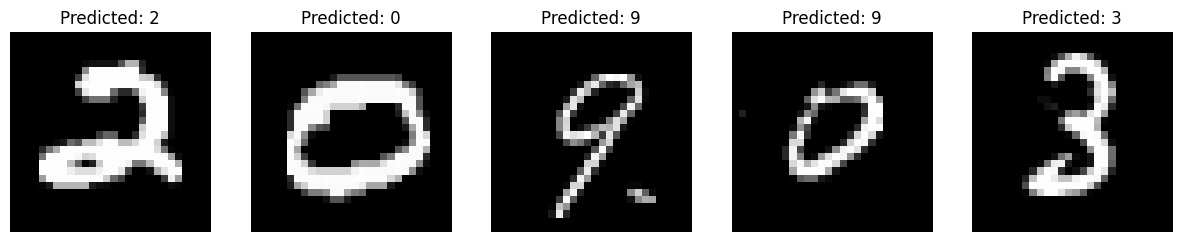

In [14]:
fig = plt.figure(figsize=(15, 5))

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(test_img[i], cmap='gray')
    ax.set_title(f'Predicted: {pred_test[i]}')
    ax.axis('off')


In [17]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))


In [18]:
!head submit.txt


ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0


Для извлечения признаков использован дескриптор HOG из библиотеки OpenCV с параметрами, рекомендованными в методических указаниях.
В качестве классификатора применён линейный метод опорных векторов (Linear SVM).
Получено значение accuracy > 0.85 на тестовой выборке Kaggle Digit Recognizer.